# Epsilon-Greedy

## Basic Imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np

## Initializing Constants

In [5]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit Class


In [41]:
class BanditArm:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0

        self.N = 0 
    def __repr__(self) -> str:
        return f'BanditArm(p={self.p:.2f}, p_estimate={self.p_estimate:.2f}, N={self.N})'
    
    def pull(self):
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

## Experiment

In [42]:
def experiment():
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]

    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal bandit: {}".format(optimal_j))

    for i in range(NUM_TRIALS):
        if np.random.random() < EPS:
            num_times_explored += 1
            j = np.random.randint(len(bandits))
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits])

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

# update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)

    return bandits,rewards,num_times_explored, num_times_exploited, num_optimal

# print mean estimates for each bandit

optimal bandit: 2
Mean Estimate: 0.2028985507246377
Mean Estimate: 0.5581395348837211
Mean Estimate: 0.7420054200542013
Total Reward Earned: 1431.0
Overall Win Rate: 0.7155
# of explored: 191
# of exploited: 1809
# of times selected the optimal bandit: 1845


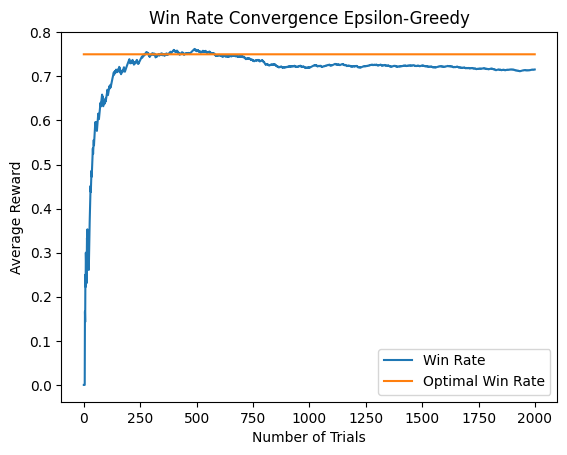

In [43]:
def report():
    bandits,rewards,num_times_explored, num_times_exploited, num_optimal=experiment()
    
    for b in bandits:
        print("Mean Estimate: {}".format(b.p_estimate))
    
    print("Total Reward Earned: {}".format(rewards.sum()))
    print("Overall Win Rate: {}".format(rewards.sum() / NUM_TRIALS))
    print("# of explored: {}".format(num_times_explored))
    print("# of exploited: {}".format(num_times_exploited))
    print("# of times selected the optimal bandit: {}".format(num_optimal))
    
    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates, label="Win Rate",)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES), label='Optimal Win Rate')
    plt.legend()
    plt.title("Win Rate Convergence Epsilon-Greedy")
    plt.xlabel("Number of Trials")
    plt.ylabel("Average Reward")
    plt.show()
    
report()

# Changing The Epsilon

## Declaring Constants

In [44]:
NUM_TRIALS = 100000
EPS = 0.1
BANDIT_RETURN = [1.5, 2.5, 3.5]

## Bandit Class

In [45]:
class BanditArm:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 0
        self.N = 0
    
    def __repr__(self) -> str:
        return f'BanditArm(p={self.p:.2f}, p_estimate={self.p_estimate:.2f}, N={self.N})'
    
    def pull(self):
        return np.random.randn() + self.p
    
    def update(self, x):
        self.N += 1
        self.p_estimate = (1 - 1.0/self.N)*self.p_estimate + 1.0/self.N*x



In [46]:
def experiment(bandit_probs,eps,N=NUM_TRIALS):
    bandits = [BanditArm(p) for p in bandit_probs]

    means = np.array(bandit_probs) # count number of suboptimal choices
    true_best = np.argmax(means)  
    count_suboptimal = 0

    data = np.empty(N)

    for i in range(N):
        
        p = np.random.random()
        if p < eps:
            j = np.random.choice(len(bandits))
        else:
            j = np.argmax([b.p_estimate for b in bandits])
        x = bandits[j].pull()
        bandits[j].update(x)

        if j != true_best:
            count_suboptimal += 1

        # for the plot
        data[i] = x

    cumulative_average = np.cumsum(data) / (np.arange(N) + 1)
    
    for b in bandits:
        print("Estimated average reward where epsilon={0}:{1}".format(eps,b.p_estimate))  
    print("Percent suboptimal where epsilon={0}: {1}".format( eps, float(count_suboptimal) / N))
    print("--------------------------------------------------")
    return cumulative_average

In [47]:
eps=[0.1,0.05,0.01]

[experiment(BANDIT_RETURN,i) for i in eps]


Estimated average reward where epsilon=0.1:1.4961074910928704
Estimated average reward where epsilon=0.1:2.5116159554783257
Estimated average reward where epsilon=0.1:3.502556029517255
Percent suboptimal where epsilon=0.1: 0.06751
--------------------------------------------------
Estimated average reward where epsilon=0.05:1.4996159074358544
Estimated average reward where epsilon=0.05:2.475862298579237
Estimated average reward where epsilon=0.05:3.4974833273121693
Percent suboptimal where epsilon=0.05: 0.03424
--------------------------------------------------
Estimated average reward where epsilon=0.01:1.5004183470041124
Estimated average reward where epsilon=0.01:2.497170690872576
Estimated average reward where epsilon=0.01:3.5024611981977967
Percent suboptimal where epsilon=0.01: 0.00973
--------------------------------------------------


[array([1.25837632, 1.072177  , 0.96300151, ..., 3.40092147, 3.4009274 ,
        3.40092728]),
 array([-0.53743946,  0.92467942,  1.66044464, ...,  3.44586159,
         3.44586551,  3.44585802]),
 array([2.80488718, 2.40031812, 2.32974544, ..., 3.48628605, 3.48628941,
        3.48625067])]

Estimated average reward where epsilon=0.1:1.4806858636264089
Estimated average reward where epsilon=0.1:2.5855021786990595
Estimated average reward where epsilon=0.1:3.5032816160465616
Percent suboptimal where epsilon=0.1: 0.06746
--------------------------------------------------
Estimated average reward where epsilon=0.05:1.4866712995101654
Estimated average reward where epsilon=0.05:2.5054511560286215
Estimated average reward where epsilon=0.05:3.5012677558498786
Percent suboptimal where epsilon=0.05: 0.03386
--------------------------------------------------
Estimated average reward where epsilon=0.01:1.5163736321162433
Estimated average reward where epsilon=0.01:2.474232438529056
Estimated average reward where epsilon=0.01:3.501066282022779
Percent suboptimal where epsilon=0.01: 0.01485
--------------------------------------------------


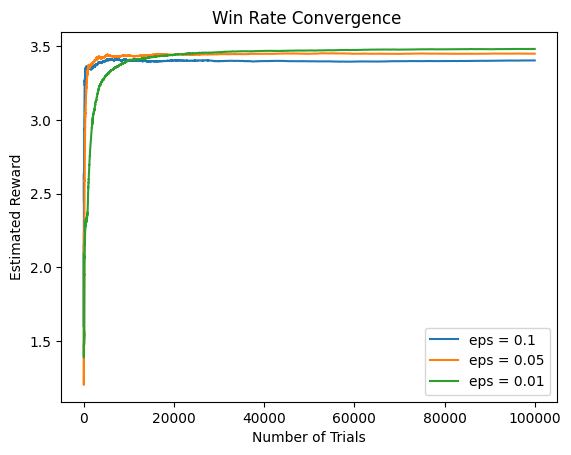

In [48]:
for i in eps:
    r=experiment(BANDIT_RETURN,i)
    plt.plot(r, label='eps = {}'.format(i))
    plt.legend()
    plt.title("Win Rate Convergence ")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")
plt.show()

Estimated average reward where epsilon=0.1:1.487362000811524
Estimated average reward where epsilon=0.1:2.4906821583222967
Estimated average reward where epsilon=0.1:3.505033010611774
Percent suboptimal where epsilon=0.1: 0.06753
--------------------------------------------------
Estimated average reward where epsilon=0.05:1.4983597800017987
Estimated average reward where epsilon=0.05:2.468738566082231
Estimated average reward where epsilon=0.05:3.5012278872936347
Percent suboptimal where epsilon=0.05: 0.03428
--------------------------------------------------
Estimated average reward where epsilon=0.01:1.4614346525254458
Estimated average reward where epsilon=0.01:2.4678249864754087
Estimated average reward where epsilon=0.01:3.50019536112909
Percent suboptimal where epsilon=0.01: 0.00905
--------------------------------------------------


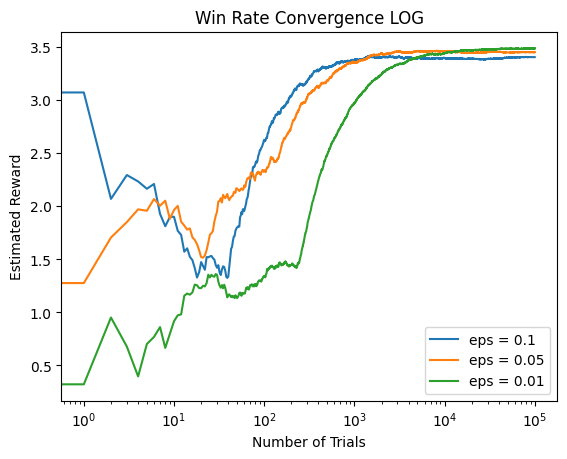

In [49]:
for i in eps:
    r=experiment(BANDIT_RETURN,i)
    plt.plot(r, label='eps = {}'.format(i))
    plt.legend()
    plt.title("Win Rate Convergence LOG")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")
    plt.xscale('log')
plt.show()


# Optimistic Initial Value

## Basic Imports

In [50]:
import numpy as np
import matplotlib.pyplot as plt

## Study Design

In [51]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit Class

In [53]:
class BanditArm:
    def __init__(self, p):
        self.p = p
        self.p_estimate = 5
        self.N = 1
    def __repr__(self) -> str:
        return f'BanditArm(p={self.p:.2f}, p_estimate={self.p_estimate:.2f}, N={self.N})'
    def pull(self):
        return np.random.random() < self.p
    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

## Experiment

In [54]:
def experiment():
    bandits=[BanditArm(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    
    for i in range(NUM_TRIALS):
        j=np.argmax([b.p_estimate for b in bandits])
        
        x=bandits[j].pull()
        
        rewards[i]=x
        
        bandits[j].update(x)
    for b in bandits:
        print("Mean Estimate: {}".format(b.p_estimate))
    
    print("Total Reward Earned: {}".format(rewards.sum()))
    print("Overall Win Rate: {}".format(rewards.sum() / NUM_TRIALS))
    
    return rewards

## Reporting

In [55]:
def plot():
    e=experiment()
    cumulative_reward=np.cumsum(e)
    win_rates=cumulative_reward/(np.arange(NUM_TRIALS)+1)
    
    plt.ylim([0,1])
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.title("Win Rate Convergence")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")

    plt.show()

Mean Estimate: 0.7142857142857143
Mean Estimate: 0.6956521739130435
Mean Estimate: 0.7493231725659264
Total Reward Earned: 7479.0
Overall Win Rate: 0.7479


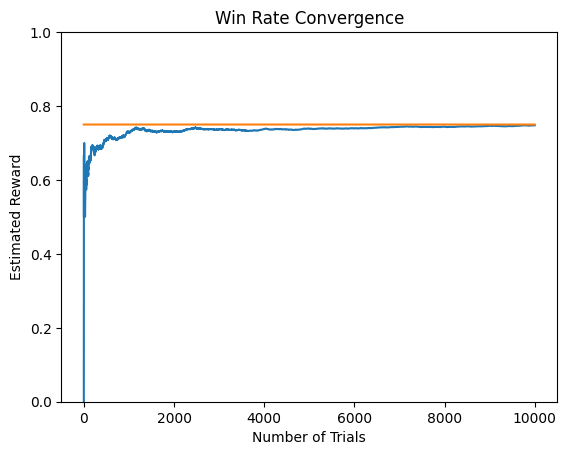

In [56]:
plot()

## UCB1
## Basic Imports

In [57]:
import numpy as np
import matplotlib.pyplot as plt

## Initializing Constants

In [58]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit Class

In [59]:
class Bandit:
    def __init__(self, p):
    # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # num samples collected so far
    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p
    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N - 1)*self.p_estimate + x) / self.N

## UCB 1 Inequality

In [60]:
def ucb(mean, n, nj):
    return mean + np.sqrt(2*np.log(n) / nj)

## Experiment

In [61]:


def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0

  # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

        # for the plot
        rewards[i] = x
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    for b in bandits:
        print("The Estimated Mean: ".format(b.p_estimate))

    print("Total Reward Earned:", rewards.sum())
    print("overall Win Rate:", rewards.sum() / NUM_TRIALS)
    print("# of times selected each bandit:", [b.N for b in bandits])
    
    return cumulative_average

## Reporting

In [62]:
def report():
    # plot moving average ctr
    cumulative_average=experiment()
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.xscale('log')
    plt.title("Win Rate Log Scale")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")
    plt.show()

  # plot moving average ctr linear
    plt.plot(cumulative_average)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.title("Win Rate Linear Scale")
    plt.xlabel("Number of Trials")
    plt.ylabel("Estimated Reward")
    plt.show()

    

The Estimated Mean: 
The Estimated Mean: 
The Estimated Mean: 
Total Reward Earned: 74796.0
overall Win Rate: 0.74796
# of times selected each bandit: [70.0, 279.0, 99654.0]


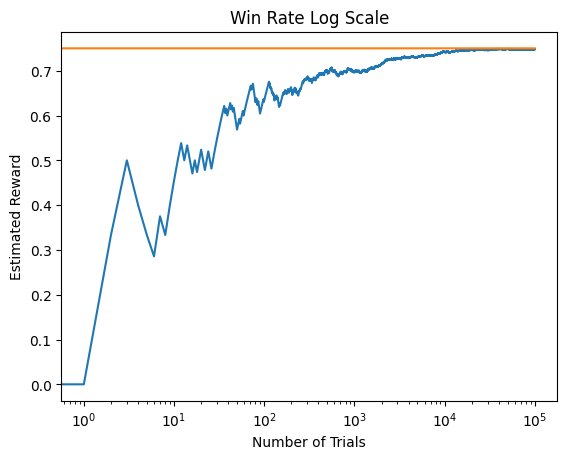

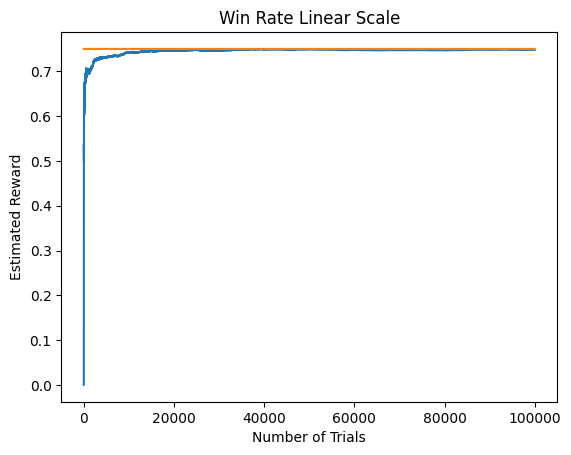

In [63]:
report()

# Tompson Sampling with Bernoulli Reward

## Beta Distribution

In [64]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
a0, b0= (1,1)
rv0 = beta(a0, b0)
a1, b1 = 4, 3
rv1 = beta(a1, b1)
a2, b2 = 100, 400
rv2 = beta(a2, b2)


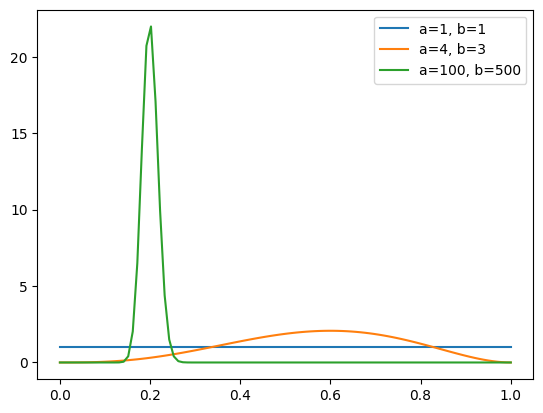

In [29]:
x = np.linspace(0, 1, 100)
plt.plot(x, rv0.pdf(x), label="a=1, b=1")
plt.plot(x, rv1.pdf(x), label="a=4, b=3")
plt.plot(x, rv2.pdf(x), label="a=100, b=500")
plt.legend()
plt.show()

## Basic Imports

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta

## Initializing Constants

In [66]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

## Bandit Class

In [67]:
class Bandit:
    def __init__(self, p):
        self.p = p
        self.a = 1
        self.b = 1
        self.N = 0

    def pull(self):
        return np.random.random() < self.p

    def sample(self):
        return np.random.beta(self.a, self.b)

    def update(self, x):
        self.a += x
        self.b += 1 - x
        self.N += 1

## Experiment

In [68]:
def plot(bandits, trial):
    x = np.linspace(0, 1, 200)
    for b in bandits:
        y = beta.pdf(x, b.a, b.b)
        plt.plot(x, y, label=f"real p: {b.p:.4f}, win rate = {b.a - 1}/{b.N}")
        plt.title("Bandit distributions after {} trials".format(trial))
        plt.legend()
    plt.show()

In [69]:
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        j = np.argmax([b.sample() for b in bandits])
    
        # plot the posteriors
        if i in sample_points:
            plot(bandits, i)
        
        x = bandits[j].pull()
        
        rewards[i] = x
        
        bandits[j].update(x)

    # print total reward
    print("Total Reward Earned: {}".format(rewards.sum()))
    print("Overall Win Rate: {}".format(rewards.sum() / NUM_TRIALS))
    print("NUmber of times selected each bandit: {}".format([b.N for b in bandits]))

## Reporting

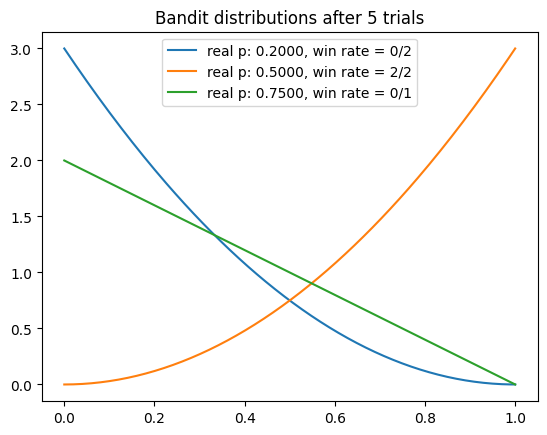

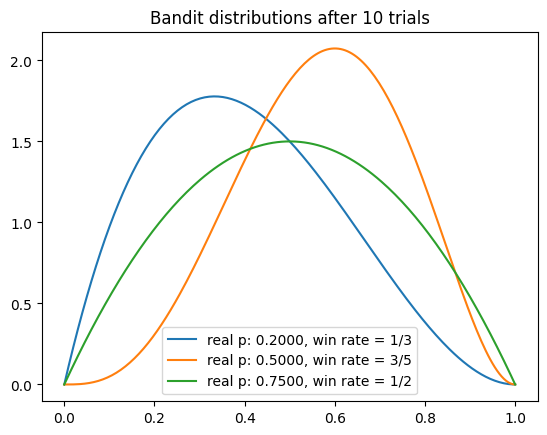

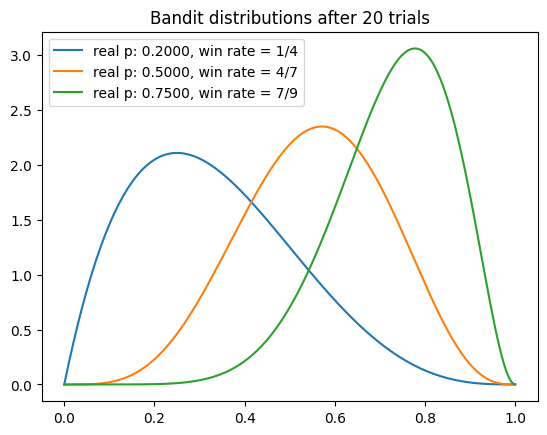

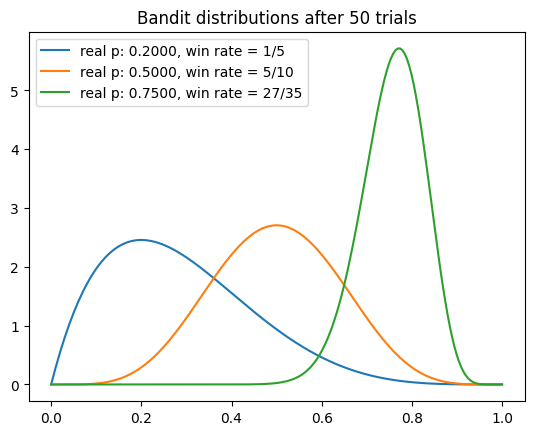

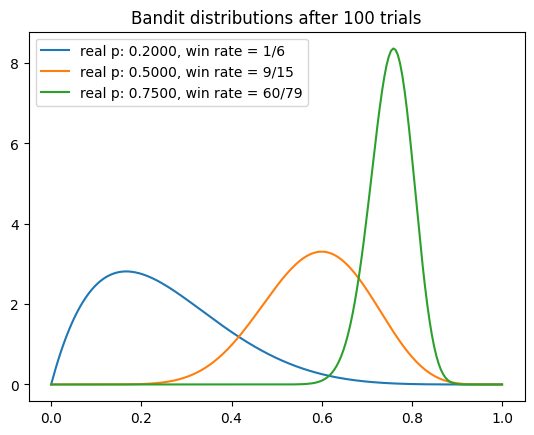

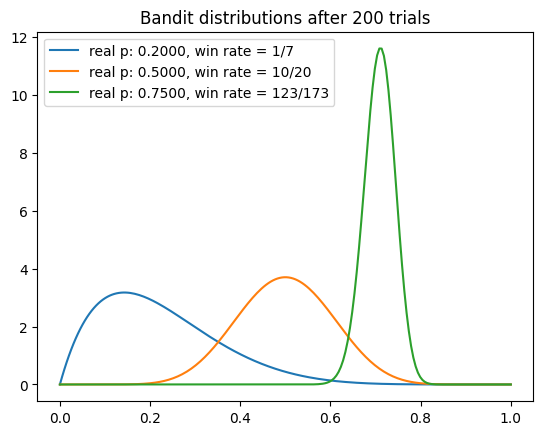

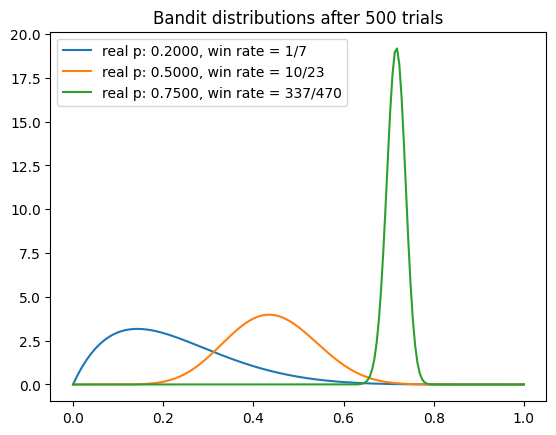

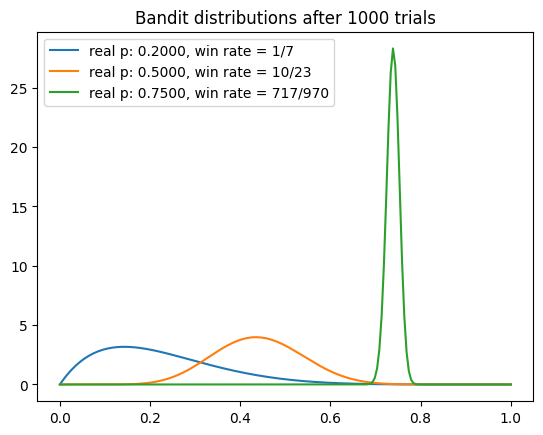

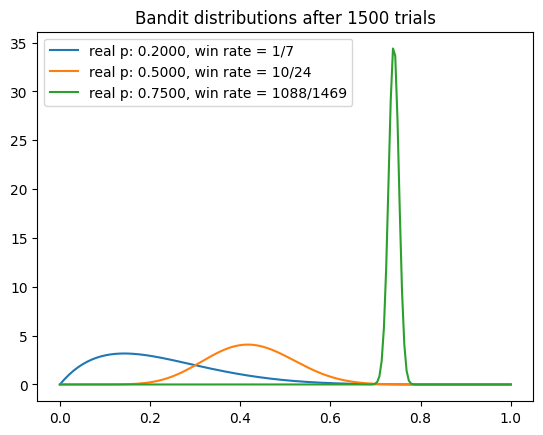

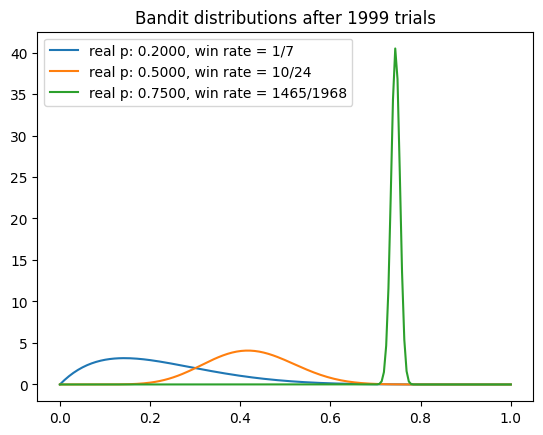

Total Reward Earned: 1476.0
Overall Win Rate: 0.738
NUmber of times selected each bandit: [7, 24, 1969]


In [70]:
experiment()

# Tompson Sampling with Gaussian Reward

## Basic Imports

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## Initializing Constants

In [72]:
np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [1, 2, 3]

## Bandit Class

In [73]:
class Bandit:
    def __init__(self, true_mean):
        self.true_mean = true_mean
        # parameters for mu - prior is N(0,1)
        self.m = 0
        self.lambda_ = 1
        self.tau = 1
        self.N = 0

    def pull(self):
        return np.random.randn() / np.sqrt(self.tau) + self.true_mean

    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.m

    def update(self, x):
        self.m = (self.tau * x + self.lambda_ * self.m) / (self.tau + self.lambda_)
        self.lambda_ += self.tau
        self.N += 1

## Experiment

In [74]:
def plot(bandits, trial):
    x = np.linspace(-3, 6, 200)
    for b in bandits:
        y = norm.pdf(x, b.m, np.sqrt(1. / b.lambda_))
        plt.plot(x, y, label=f"real mean: {b.true_mean:.4f}, num plays: {b.N}")
        #--PAY ATTENTION TO THE PATH--#
#         plt.savefig("img/output/Gaussian_{}.png".format(trial))
        plt.title("Bandit distributions after {} trials".format(trial))
    plt.legend()
    plt.show()


def experiment():
    bandits = [Bandit(m) for m in BANDIT_MEANS]

    sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
    rewards = np.empty(NUM_TRIALS)
    for i in range(NUM_TRIALS):
        j = np.argmax([b.sample() for b in bandits])

        if i in sample_points:
            plot(bandits, i)
            
        x = bandits[j].pull()

        bandits[j].update(x)
        
        rewards[i] = x

    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    
    plt.plot(cumulative_average)
    
    for m in BANDIT_MEANS:
        plt.plot(np.ones(NUM_TRIALS)*m)
        
    plt.show()

    return cumulative_average

## Reporting

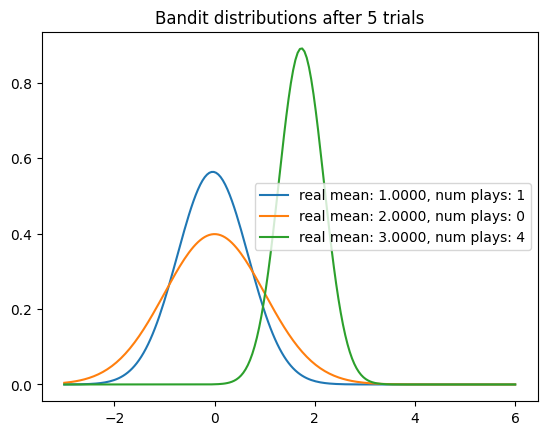

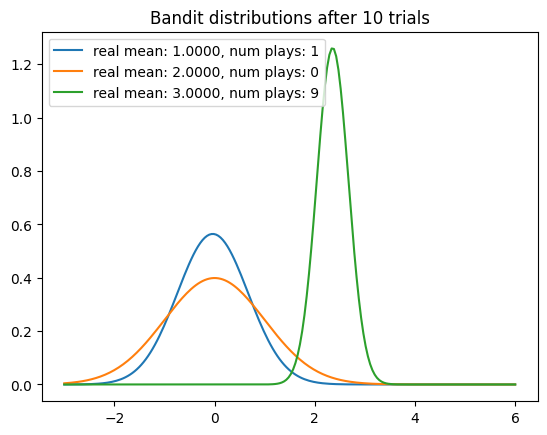

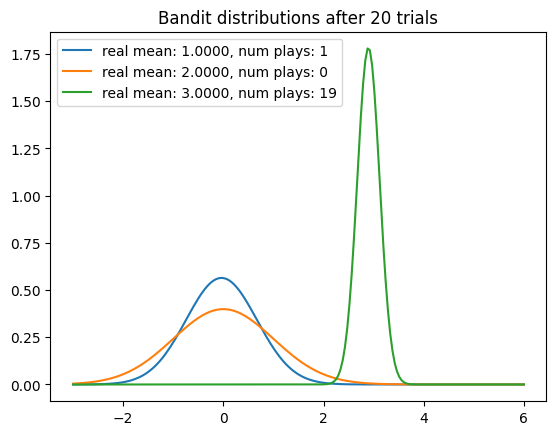

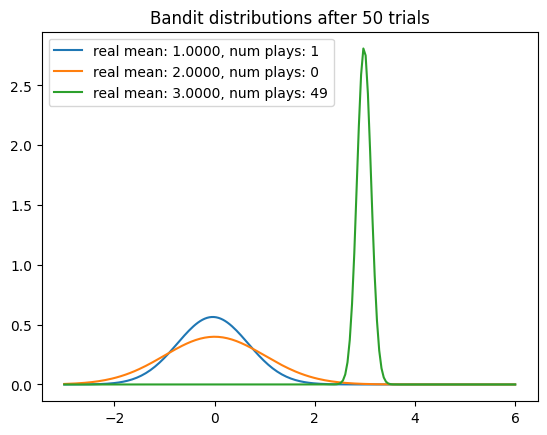

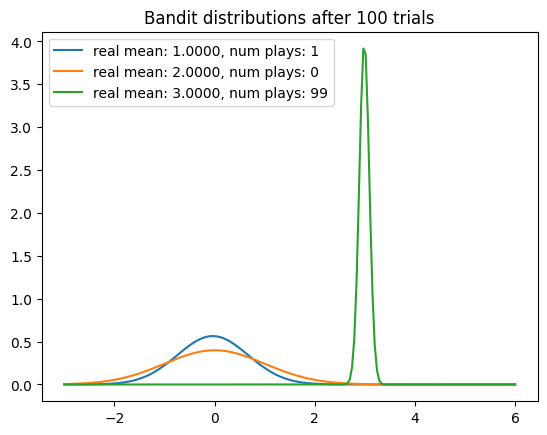

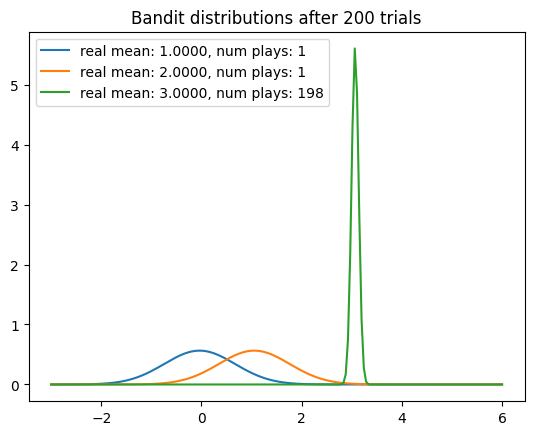

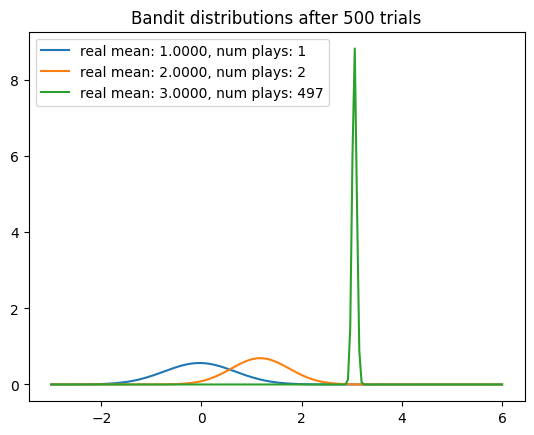

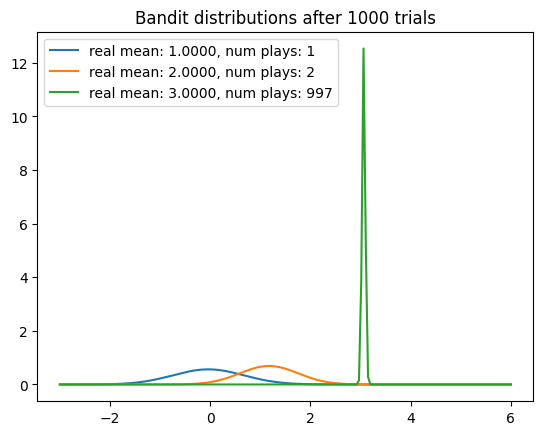

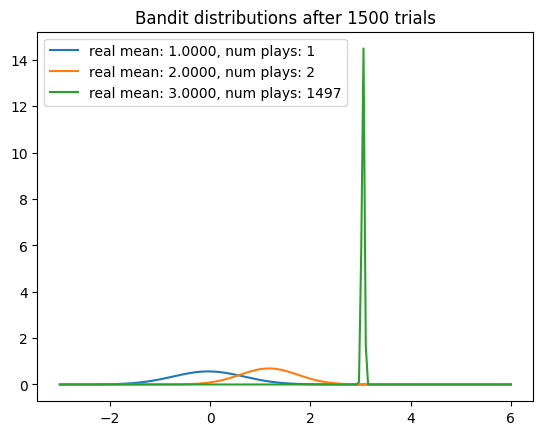

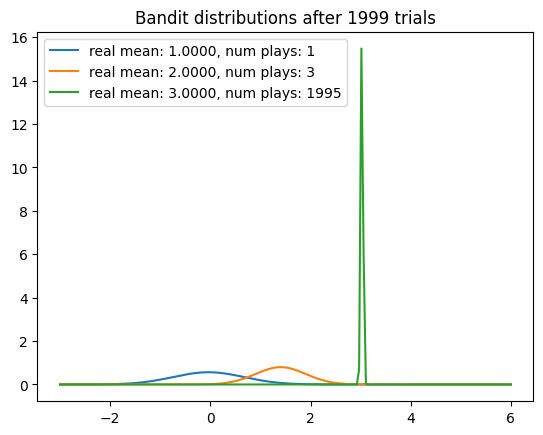

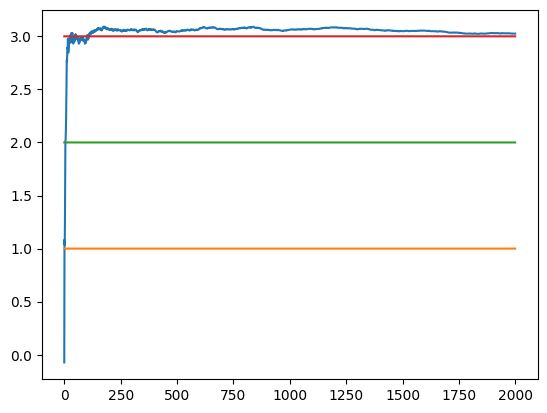

array([-0.07296862,  1.08291224,  1.03522792, ...,  3.02540608,
        3.02520262,  3.02569308])

In [75]:
experiment()